In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [118]:
df = pd.read_csv('QVI_data.csv')
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [120]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['MONTH'] = df['DATE'].dt.to_period('M')

In [121]:
stores_performance = df.groupby(['STORE_NBR', 'MONTH']).agg({'TOT_SALES':'sum', 'LYLTY_CARD_NBR': 'nunique', 'PROD_QTY':'mean'})
stores_performance['AVG_TXN_PER_CUSTOMER'] = df.groupby(['STORE_NBR', 'MONTH'])['TXN_ID'].count()/stores_performance['LYLTY_CARD_NBR']
stores_performance['AVG_PRICE_PER_UNIT'] = df.groupby(['STORE_NBR', 'MONTH'])['TOT_SALES'].sum()/df.groupby(['STORE_NBR', 'MONTH'])['PROD_QTY'].sum()
stores_performance.rename(columns={'LYLTY_CARD_NBR':"NO_OF_CUSTOMERS"}, inplace = True)
stores_performance.head()

TOT_SALES  NO_OF_CUSTOMERS  PROD_QTY  AVG_TXN_PER_CUSTOMER  \
STORE_NBR MONTH                                                                 
1         2018-07      206.9               49  1.192308              1.061224   
          2018-08      176.1               42  1.255814              1.023810   
          2018-09      278.8               59  1.209677              1.050847   
          2018-10      188.1               44  1.288889              1.022727   
          2018-11      192.6               46  1.212766              1.021739   

                   AVG_PRICE_PER_UNIT  
STORE_NBR MONTH                        
1         2018-07            3.337097  
          2018-08            3.261111  
          2018-09            3.717333  
          2018-10            3.243103  
          2018-11            3.378947

In [122]:
stores_performance.reset_index(inplace=True)
stores_performance.head()

,STORE_NBR,MONTH,TOT_SALES,NO_OF_CUSTOMERS,PROD_QTY,AVG_TXN_PER_CUSTOMER,AVG_PRICE_PER_UNIT
0,1,2018-07,206.9,49,1.192308,1.061224,3.337097
1,1,2018-08,176.1,42,1.255814,1.023810,3.261111
2,1,2018-09,278.8,59,1.209677,1.050847,3.717333
3,1,2018-10,188.1,44,1.288889,1.022727,3.243103
4,1,2018-11,192.6,46,1.212766,1.021739,3.378947


In [123]:
store_counts = stores_performance.groupby('STORE_NBR').size().reset_index(name='N')
stores_with_full_observation = store_counts[store_counts['N']==12]
stores_with_full_observation

,STORE_NBR,N
0,1,12
1,2,12
2,3,12
3,4,12
4,5,12
...,...,...
267,268,12
268,269,12
269,270,12
270,271,12


In [124]:
pre_trial_measures = stores_performance[(stores_performance['MONTH']<'2019-02')&(stores_performance['STORE_NBR'].isin(stores_with_full_observation['STORE_NBR']))]
pre_trial_measures

,STORE_NBR,MONTH,TOT_SALES,NO_OF_CUSTOMERS,PROD_QTY,AVG_TXN_PER_CUSTOMER,AVG_PRICE_PER_UNIT
0,1,2018-07,206.9,49,1.192308,1.061224,3.337097
1,1,2018-08,176.1,42,1.255814,1.023810,3.261111
2,1,2018-09,278.8,59,1.209677,1.050847,3.717333
3,1,2018-10,188.1,44,1.288889,1.022727,3.243103
4,1,2018-11,192.6,46,1.212766,1.021739,3.378947
...,...,...,...,...,...,...,...
3159,272,2018-09,304.7,32,1.972222,1.125000,4.291549
3160,272,2018-10,430.6,44,1.941176,1.159091,4.349495
3161,272,2018-11,376.2,41,1.933333,1.097561,4.324138
3162,272,2018-12,403.9,47,1.893617,1.000000,4.538202


In [125]:
trail_store_77 = stores_performance[(stores_performance['STORE_NBR']==77) & (stores_performance['MONTH']<'2019-02')]
trail_store_77

,STORE_NBR,MONTH,TOT_SALES,NO_OF_CUSTOMERS,PROD_QTY,AVG_TXN_PER_CUSTOMER,AVG_PRICE_PER_UNIT
880,77,2018-07,296.8,51,1.527273,1.078431,3.533333
881,77,2018-08,255.5,47,1.541667,1.021277,3.452703
882,77,2018-09,225.2,42,1.590909,1.047619,3.217143
883,77,2018-10,204.5,37,1.368421,1.027027,3.932692
884,77,2018-11,245.3,41,1.522727,1.073171,3.661194
885,77,2018-12,267.3,46,1.469388,1.065217,3.712500
886,77,2019-01,204.4,35,1.666667,1.114286,3.144615


In [126]:
trail_store_86 = stores_performance[(stores_performance['STORE_NBR']==86) & (stores_performance['MONTH']<'2019-02')]
trail_store_86

,STORE_NBR,MONTH,TOT_SALES,NO_OF_CUSTOMERS,PROD_QTY,AVG_TXN_PER_CUSTOMER,AVG_PRICE_PER_UNIT
977,86,2018-07,892.20,99,1.992063,1.272727,3.554582
978,86,2018-08,764.05,94,1.919643,1.191489,3.553721
979,86,2018-09,914.60,103,2.000000,1.252427,3.544961
980,86,2018-10,948.40,109,2.000000,1.266055,3.436232
981,86,2018-11,918.00,100,2.000000,1.270000,3.614173
982,86,2018-12,841.20,98,2.000000,1.224490,3.505000
983,86,2019-01,841.40,94,2.000000,1.382979,3.236154


In [127]:
trail_store_88 = stores_performance[(stores_performance['STORE_NBR']==88) & (stores_performance['MONTH']<'2019-02')]
trail_store_88

,STORE_NBR,MONTH,TOT_SALES,NO_OF_CUSTOMERS,PROD_QTY,AVG_TXN_PER_CUSTOMER,AVG_PRICE_PER_UNIT
1001,88,2018-07,1310.0,129,2.00000,1.186047,4.281046
1002,88,2018-08,1323.8,131,1.89375,1.221374,4.368977
1003,88,2018-09,1423.0,124,2.00000,1.282258,4.474843
1004,88,2018-10,1352.4,123,2.00000,1.284553,4.279747
1005,88,2018-11,1382.8,130,2.00000,1.207692,4.403822
1006,88,2018-12,1325.2,126,2.00000,1.182540,4.446980
1007,88,2019-01,1266.4,117,2.00000,1.247863,4.336986


# correlation calculation

In [128]:
def correlation_calculation(dataframe, metric, trial_store):
    corr_table = pd.DataFrame(columns=['trail_store', 'control_store', 'correlation'])
    store_numbers = dataframe['STORE_NBR'].unique()
    for store in store_numbers:
        if store != trial_store:
            trial_data = dataframe[dataframe['STORE_NBR'] == trial_store][[metric]].reset_index()
            control_data = dataframe[dataframe['STORE_NBR'] == store][[metric]].reset_index()
            
            correlation = trial_data.corrwith(control_data)[1]
            calculated_measure = pd.DataFrame({'trail_store':[trial_store],
                                               'control_store':[store],
                                               'correlation':[correlation]})
            
            corr_table = pd.concat([corr_table, calculated_measure], ignore_index=True)
            
    return corr_table

# standardised magnitude distance

In [129]:
def measure_calculation(dataframe, metric, trial_store):
    calculated_distance_df = pd.DataFrame(columns=['month', 'trial_store', 'control_store', 'measure'])
    store_numbers = dataframe['STORE_NBR'].unique()
    
    for store in store_numbers:
        if store != trial_store:
            trial_data = dataframe[dataframe['STORE_NBR']==trial_store].reset_index()
            control_data = dataframe[dataframe['STORE_NBR']==store].reset_index()
        
            measure = abs(trial_data[metric].values-control_data[metric].values)
        
            calculated_measure = pd.DataFrame({'month':trial_data['MONTH'].values,
                                          'trial_store':trial_store,
                                          'control_store':store,
                                          'measure':measure})
        
            calculated_distance_df = pd.concat([calculated_distance_df, calculated_measure], ignore_index=True)
     
    min_max_dist = calculated_distance_df.groupby(['month', 'trial_store'])['measure'].agg(['min', 'max']).reset_index()
    calculated_distance_df = calculated_distance_df.merge(min_max_dist, on=['month', 'trial_store'])
    calculated_distance_df['magnitude_measure'] = 1 - (calculated_distance_df['measure'] - calculated_distance_df['min']) / (calculated_distance_df['max'] - calculated_distance_df['min'])
    
    final_dist_df = calculated_distance_df.groupby(['trial_store', 'control_store'])['magnitude_measure'].mean().reset_index()
    return final_dist_df

# Analysis of trial store 77 to find its matching control store:

In [130]:
store_77_sales_corr = correlation_calculation(pre_trial_measures, 'TOT_SALES', 77)
store_77_sales_measure = measure_calculation(pre_trial_measures, 'TOT_SALES', 77)
store_77_sales_score = store_77_sales_corr.merge(store_77_sales_measure, on='control_store', suffixes=['_corr', '_mag'])
store_77_sales_score['combined_score_sales'] = (store_77_sales_score['correlation'] + store_77_sales_score['magnitude_measure'])/2
store_77_sales_score = store_77_sales_score.drop(['trial_store'], axis=1)
store_77_sales_score.head()

,trail_store,control_store,correlation,magnitude_measure,combined_score_sales
0,77,1,0.075218,0.955061,0.515139
1,77,2,-0.263079,0.939318,0.338120
2,77,3,0.806644,0.354963,0.580803
3,77,4,-0.263300,0.177414,-0.042943
4,77,5,-0.110652,0.554066,0.221707


In [131]:
store_77_customers_corr = correlation_calculation(pre_trial_measures, 'NO_OF_CUSTOMERS', 77)
store_77_customers_measure = measure_calculation(pre_trial_measures, 'NO_OF_CUSTOMERS', 77)
store_77_customers_score = store_77_customers_corr.merge(store_77_customers_measure, on='control_store', suffixes=['_corr', '_mag'])
store_77_customers_score['combined_score_customers'] = (store_77_customers_corr['correlation'] + store_77_customers_measure['magnitude_measure'])/2
store_77_customers_score = store_77_customers_score.drop(['trial_store'], axis=1)
store_77_customers_score.head()

,trail_store,control_store,correlation,magnitude_measure,combined_score_customers
0,77,1,0.322168,0.940321,0.631244
1,77,2,-0.572051,0.924638,0.176294
2,77,3,0.834207,0.345067,0.589637
3,77,4,-0.295639,0.189579,-0.053030
4,77,5,0.370659,0.481199,0.425929


In [132]:
store_77_score = store_77_sales_score.merge(store_77_customers_score, on='control_store', suffixes=['_sales', '_customers'])
store_77_score = store_77_score.drop(['trail_store_customers'], axis=1)
store_77_score['final_control_score'] = (store_77_score['combined_score_sales']+store_77_score['combined_score_customers'])/2
store_77_score.head()

,trail_store_sales,control_store,correlation_sales,magnitude_measure_sales,combined_score_sales,correlation_customers,magnitude_measure_customers,combined_score_customers,final_control_score
0,77,1,0.075218,0.955061,0.515139,0.322168,0.940321,0.631244,0.573192
1,77,2,-0.263079,0.939318,0.338120,-0.572051,0.924638,0.176294,0.257207
2,77,3,0.806644,0.354963,0.580803,0.834207,0.345067,0.589637,0.585220
3,77,4,-0.263300,0.177414,-0.042943,-0.295639,0.189579,-0.053030,-0.047986
4,77,5,-0.110652,0.554066,0.221707,0.370659,0.481199,0.425929,0.323818


In [133]:
store_77_score.sort_values(['final_control_score'], ascending = False).head()

,trail_store_sales,control_store,correlation_sales,magnitude_measure_sales,combined_score_sales,correlation_customers,magnitude_measure_customers,combined_score_customers,final_control_score
220,77,233,0.903774,0.987091,0.945433,0.990358,0.992773,0.991566,0.968499
38,77,41,0.783232,0.966917,0.875075,0.844219,0.974639,0.909429,0.892252
15,77,17,0.842668,0.882314,0.862491,0.747308,0.962495,0.854902,0.858696
240,77,254,0.577108,0.924468,0.750788,0.916208,0.937131,0.926670,0.838729
107,77,115,0.689159,0.934576,0.811868,0.718882,0.965916,0.842399,0.827133


# control store for the trial store 77 is 233

In [134]:
stores_performance_sales = stores_performance
stores_performance_sales['TRANSACTION_MONTH'] = stores_performance_sales['MONTH'].astype(str)
stores_performance_sales['TRANSACTION_MONTH'] = pd.to_datetime(stores_performance_sales['TRANSACTION_MONTH'], format='%Y-%m')+pd.offsets.MonthBegin(1)
stores_performance_sales.head()

,STORE_NBR,MONTH,TOT_SALES,NO_OF_CUSTOMERS,PROD_QTY,AVG_TXN_PER_CUSTOMER,AVG_PRICE_PER_UNIT,TRANSACTION_MONTH
0,1,2018-07,206.9,49,1.192308,1.061224,3.337097,2018-08-01
1,1,2018-08,176.1,42,1.255814,1.023810,3.261111,2018-09-01
2,1,2018-09,278.8,59,1.209677,1.050847,3.717333,2018-10-01
3,1,2018-10,188.1,44,1.288889,1.022727,3.243103,2018-11-01
4,1,2018-11,192.6,46,1.212766,1.021739,3.378947,2018-12-01


In [135]:
for i, j in stores_performance_sales.iterrows():
    if j['STORE_NBR'] == 77:
        stores_performance_sales.loc[i, 'STORE_TYPE'] = 'Trial'
    elif j['STORE_NBR'] == 233:
        stores_performance_sales.loc[i, 'STORE_TYPE'] = 'Control'
    else:
        stores_performance_sales.loc[i, 'STORE_TYPE'] = 'Other stores'
        
stores_performance_sales.head()

,STORE_NBR,MONTH,TOT_SALES,NO_OF_CUSTOMERS,PROD_QTY,AVG_TXN_PER_CUSTOMER,AVG_PRICE_PER_UNIT,TRANSACTION_MONTH,STORE_TYPE
0,1,2018-07,206.9,49,1.192308,1.061224,3.337097,2018-08-01,Other stores
1,1,2018-08,176.1,42,1.255814,1.023810,3.261111,2018-09-01,Other stores
2,1,2018-09,278.8,59,1.209677,1.050847,3.717333,2018-10-01,Other stores
3,1,2018-10,188.1,44,1.288889,1.022727,3.243103,2018-11-01,Other stores
4,1,2018-11,192.6,46,1.212766,1.021739,3.378947,2018-12-01,Other stores


In [136]:
past_sales = stores_performance_sales[stores_performance_sales['MONTH']<'2019-03'].groupby(['TRANSACTION_MONTH', 'STORE_TYPE'])['TOT_SALES'].mean()
past_sales = pd.DataFrame(past_sales).reset_index()
past_sales

,TRANSACTION_MONTH,STORE_TYPE,TOT_SALES
0,2018-08-01,Control,290.700000
1,2018-08-01,Other stores,623.817424
2,2018-08-01,Trial,296.800000
3,2018-09-01,Control,285.900000
4,2018-09-01,Other stores,603.600192
5,2018-09-01,Trial,255.500000
6,2018-10-01,Control,228.600000
7,2018-10-01,Other stores,610.947328
8,2018-10-01,Trial,225.200000
9,2018-11-01,Control,185.700000


(array([17744., 17775., 17805., 17836., 17866., 17897., 17928., 17956.]),
 [Text(17744.0, 0, '2018-08'),
  Text(17775.0, 0, '2018-09'),
  Text(17805.0, 0, '2018-10'),
  Text(17836.0, 0, '2018-11'),
  Text(17866.0, 0, '2018-12'),
  Text(17897.0, 0, '2019-01'),
  Text(17928.0, 0, '2019-02'),
  Text(17956.0, 0, '2019-03')])

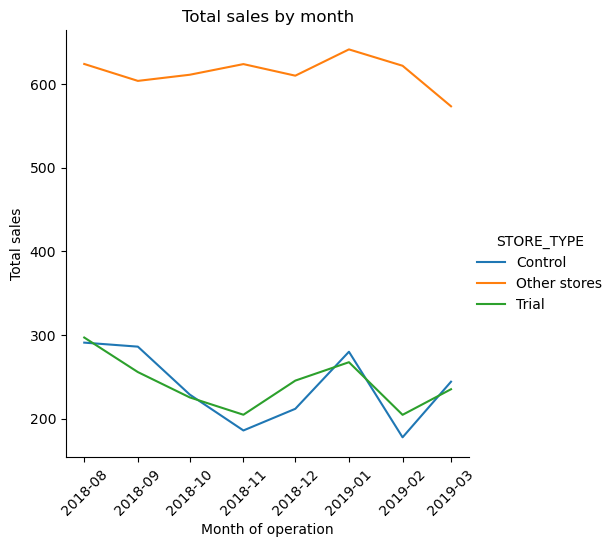

In [137]:
sns.relplot(data=past_sales, x='TRANSACTION_MONTH',y='TOT_SALES', hue='STORE_TYPE', kind='line' )
plt.xlabel('Month of operation')
plt.ylabel('Total sales')
plt.title('Total sales by month')
plt.xticks(rotation=45)

In [138]:
stores_performance_customers = stores_performance
stores_performance_customers['TRANSACTION_MONTH'] = stores_performance_customers['MONTH'].astype(str)
stores_performance_customers['TRANSACTION_MONTH'] = pd.to_datetime(stores_performance_customers['TRANSACTION_MONTH'], format='%Y-%m')+pd.offsets.MonthBegin(1)

for i, j in stores_performance_customers.iterrows():
    if j['STORE_NBR'] == 77:
        stores_performance_customers.loc[i, 'STORE_TYPE'] = 'Trial'
    elif j['STORE_NBR'] == 233:
        stores_performance_customers.loc[i, 'STORE_TYPE'] = 'Control'
    else:
        stores_performance_customers.loc[i, 'STORE_TYPE'] = 'Other stores'
        
past_customers = stores_performance_customers[stores_performance_customers['MONTH']<'2019-03'].groupby(['TRANSACTION_MONTH', 'STORE_TYPE'])['NO_OF_CUSTOMERS'].mean()
past_customers = pd.DataFrame(past_customers).reset_index()

(array([17744., 17775., 17805., 17836., 17866., 17897., 17928., 17956.]),
 [Text(17744.0, 0, '2018-08'),
  Text(17775.0, 0, '2018-09'),
  Text(17805.0, 0, '2018-10'),
  Text(17836.0, 0, '2018-11'),
  Text(17866.0, 0, '2018-12'),
  Text(17897.0, 0, '2019-01'),
  Text(17928.0, 0, '2019-02'),
  Text(17956.0, 0, '2019-03')])

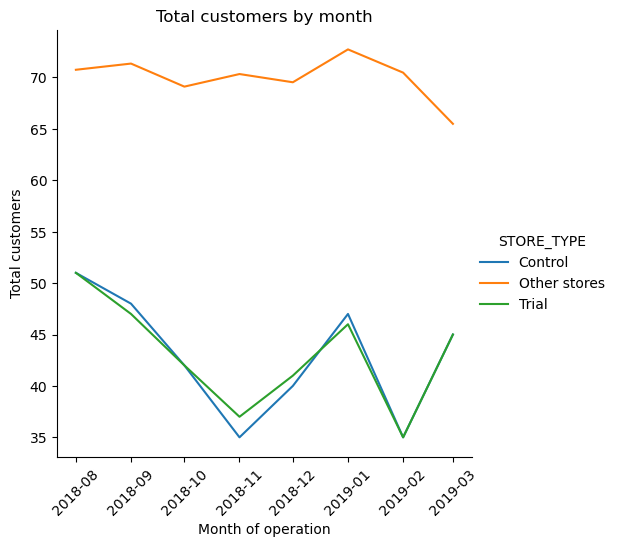

In [139]:
sns.relplot(data=past_customers, x='TRANSACTION_MONTH',y='NO_OF_CUSTOMERS', hue='STORE_TYPE', kind='line' )
plt.xlabel('Month of operation')
plt.ylabel('Total customers')
plt.title('Total customers by month')
plt.xticks(rotation=45)

In [230]:
scaling_factor_sales = pre_trial_measures[pre_trial_measures['STORE_NBR']==77]['TOT_SALES'].sum()/pre_trial_measures[pre_trial_measures['STORE_NBR']==233]['TOT_SALES'].sum()

scaling_factor_sales

1.023617303289553

In [231]:
stores_performance_sales['SCALED_SALES'] =  stores_performance_sales.loc[stores_performance_sales['STORE_NBR']==233, 'TOT_SALES'] * scaling_factor_sales
stores_performance_sales.head()

,STORE_NBR,MONTH,TOT_SALES,NO_OF_CUSTOMERS,PROD_QTY,AVG_TXN_PER_CUSTOMER,AVG_PRICE_PER_UNIT,TRANSACTION_MONTH,STORE_TYPE,SCALED_SALES
0,1,2018-07,206.9,49,1.192308,1.061224,3.337097,2018-08-01,Other stores,NaN
1,1,2018-08,176.1,42,1.255814,1.023810,3.261111,2018-09-01,Other stores,NaN
2,1,2018-09,278.8,59,1.209677,1.050847,3.717333,2018-10-01,Other stores,NaN
3,1,2018-10,188.1,44,1.288889,1.022727,3.243103,2018-11-01,Other stores,NaN
4,1,2018-11,192.6,46,1.212766,1.021739,3.378947,2018-12-01,Other stores,NaN


In [232]:
trial_store = stores_performance_sales[stores_performance_sales['STORE_NBR']==77]
control_store = stores_performance_sales[stores_performance_sales['STORE_NBR']==233]

In [233]:
trial_store

,STORE_NBR,MONTH,TOT_SALES,NO_OF_CUSTOMERS,PROD_QTY,AVG_TXN_PER_CUSTOMER,AVG_PRICE_PER_UNIT,TRANSACTION_MONTH,STORE_TYPE,SCALED_SALES
880,77,2018-07,296.8,51,1.527273,1.078431,3.533333,2018-08-01,Trial,NaN
881,77,2018-08,255.5,47,1.541667,1.021277,3.452703,2018-09-01,Trial,NaN
882,77,2018-09,225.2,42,1.590909,1.047619,3.217143,2018-10-01,Trial,NaN
883,77,2018-10,204.5,37,1.368421,1.027027,3.932692,2018-11-01,Trial,NaN
884,77,2018-11,245.3,41,1.522727,1.073171,3.661194,2018-12-01,Trial,NaN
885,77,2018-12,267.3,46,1.469388,1.065217,3.712500,2019-01-01,Trial,NaN
886,77,2019-01,204.4,35,1.666667,1.114286,3.144615,2019-02-01,Trial,NaN
887,77,2019-02,235.0,45,1.644444,1.000000,3.175676,2019-03-01,Trial,NaN
888,77,2019-03,278.5,50,1.490909,1.100000,3.396341,2019-04-01,Trial,NaN
889,77,2019-04,263.5,47,1.625000,1.021277,3.378205,2019-05-01,Trial,NaN


In [234]:
control_store

,STORE_NBR,MONTH,TOT_SALES,NO_OF_CUSTOMERS,PROD_QTY,AVG_TXN_PER_CUSTOMER,AVG_PRICE_PER_UNIT,TRANSACTION_MONTH,STORE_TYPE,SCALED_SALES
2699,233,2018-07,290.7,51,1.629630,1.058824,3.303409,2018-08-01,Control,297.565550
2700,233,2018-08,285.9,48,1.600000,1.041667,3.573750,2018-09-01,Control,292.652187
2701,233,2018-09,228.6,42,1.555556,1.071429,3.265714,2018-10-01,Control,233.998916
2702,233,2018-10,185.7,35,1.555556,1.028571,3.316071,2018-11-01,Control,190.085733
2703,233,2018-11,211.6,40,1.512195,1.025000,3.412903,2018-12-01,Control,216.597421
2704,233,2018-12,279.8,47,1.500000,1.063830,3.730667,2019-01-01,Control,286.408121
2705,233,2019-01,177.5,35,1.342857,1.000000,3.776596,2019-02-01,Control,181.692071
2706,233,2019-02,244.0,45,1.489362,1.044444,3.485714,2019-03-01,Control,249.762622
2707,233,2019-03,199.1,40,1.439024,1.025000,3.374576,2019-04-01,Control,203.802205
2708,233,2019-04,158.6,30,1.393939,1.100000,3.447826,2019-05-01,Control,162.345704


In [235]:
percentage_diff = trial_store.merge(control_store, on='TRANSACTION_MONTH')
percentage_diff = percentage_diff[['TRANSACTION_MONTH', 'STORE_NBR_x', 'TOT_SALES_x', 'TOT_SALES_y', 'SCALED_SALES']]
mapping = {'STORE_NBR_x':'Trial_store', 'STORE_NBR_y':'COntrol_sales', 'TOT_SALES_x':'Trial_store_sales', 'TOT_SALES_y':'Control_store_sales'}
percentage_diff.rename(columns=mapping, inplace=True)
percentage_diff['Percentage_difference'] = (abs(percentage_diff['Trial_store_sales']-percentage_diff['Control_store_sales'])/percentage_diff['Control_store_sales'] * 100)

KeyError: "['SCALED_SALES'] not in index"

In [229]:
percentage_diff

,STORE_NBR_x,MONTH_x,TOT_SALES_x,NO_OF_CUSTOMERS_x,PROD_QTY_x,AVG_TXN_PER_CUSTOMER_x,AVG_PRICE_PER_UNIT_x,TRANSACTION_MONTH,STORE_TYPE_x,SCALED_SALES_x,STORE_NBR_y,MONTH_y,TOT_SALES_y,NO_OF_CUSTOMERS_y,PROD_QTY_y,AVG_TXN_PER_CUSTOMER_y,AVG_PRICE_PER_UNIT_y,STORE_TYPE_y,SCALED_SALES_y
0,77,2018-07,296.8,51,1.527273,1.078431,3.533333,2018-08-01,Trial,NaN,233,2018-07,290.7,51,1.629630,1.058824,3.303409,Control,297.565550
1,77,2018-08,255.5,47,1.541667,1.021277,3.452703,2018-09-01,Trial,NaN,233,2018-08,285.9,48,1.600000,1.041667,3.573750,Control,292.652187
2,77,2018-09,225.2,42,1.590909,1.047619,3.217143,2018-10-01,Trial,NaN,233,2018-09,228.6,42,1.555556,1.071429,3.265714,Control,233.998916
3,77,2018-10,204.5,37,1.368421,1.027027,3.932692,2018-11-01,Trial,NaN,233,2018-10,185.7,35,1.555556,1.028571,3.316071,Control,190.085733
4,77,2018-11,245.3,41,1.522727,1.073171,3.661194,2018-12-01,Trial,NaN,233,2018-11,211.6,40,1.512195,1.025000,3.412903,Control,216.597421
5,77,2018-12,267.3,46,1.469388,1.065217,3.712500,2019-01-01,Trial,NaN,233,2018-12,279.8,47,1.500000,1.063830,3.730667,Control,286.408121
6,77,2019-01,204.4,35,1.666667,1.114286,3.144615,2019-02-01,Trial,NaN,233,2019-01,177.5,35,1.342857,1.000000,3.776596,Control,181.692071
7,77,2019-02,235.0,45,1.644444,1.000000,3.175676,2019-03-01,Trial,NaN,233,2019-02,244.0,45,1.489362,1.044444,3.485714,Control,249.762622
8,77,2019-03,278.5,50,1.490909,1.100000,3.396341,2019-04-01,Trial,NaN,233,2019-03,199.1,40,1.439024,1.025000,3.374576,Control,203.802205
9,77,2019-04,263.5,47,1.625000,1.021277,3.378205,2019-05-01,Trial,NaN,233,2019-04,158.6,30,1.393939,1.100000,3.447826,Control,162.345704


# Hypothesis Testing

Null Hypothesis: sales in trial store and control store are same in the pre-trail period.

In [218]:
from scipy import stats

In [219]:
std_dev = percentage_diff[percentage_diff['TRANSACTION_MONTH']<'2019-02-01']['Percentage_difference'].std(ddof=1)
std_dev

9.731394967138087

In [220]:
trial_months = percentage_diff[percentage_diff['TRANSACTION_MONTH'].isin(['2019-02-01', '2019-03-01', '2019-04-01'])]['Percentage_difference']
sample_mean = trial_months.mean()
sample_std_dev = trial_months.std(ddof=1)
trial_months

6    15.154930
7    -3.688525
8    39.879458
Name: Percentage_difference, dtype: float64

In [221]:
df = len(trial_months) - 1
t_values = (trial_months - sample_mean) / (sample_std_dev / (len(trial_months) ** 0.5))
t_values

6   -0.155397
7   -1.649116
8    1.804513
Name: Percentage_difference, dtype: float64

In [223]:
percentile_95 = stats.t.ppf(0.95, 7)
percentile_95

1.894578605061305